<a href="https://colab.research.google.com/github/xafer-gab/leitura_a_primeira_vista/blob/main/Leitura_%C3%A0_primeira_vista_(LilyPond).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎼 **Estudos de leitura à Primeira Vista**

Este projeto é um aplicativo interativo para o estudo de leitura à primeira vista, focado na geração de sequências musicais randômicas e visualização da notação musical por meio de *LilyPond*.

### Para utilizar o aplicativo, siga os passos:

1.   Execute a célula "Configurar aplicativo no Google Colab" e aguarde a instalação das dependências.
2.   Configure os parâmetros do exercício de leitura e execute a célula "Leitura à primeira vista".
3.   Realize a leitura. Para gerar outro exercício, execute a célula novamente.

---

Projeto desenvolvido por Gabriel Xavier (IA-UNESP)


In [ ]:
#@title Configurar aplicativo no Google Colab
!apt-get install -y lilypond

GNU LilyPond 2.22.1
Processing `leitura.ly'
Parsing...
Interpreting music...[8]
Preprocessing graphical objects...
Finding the ideal number of pages...
Fitting music on 1 page...
Drawing systems...
Layout output to `leitura.eps'...
Converting to PNG...
Layout output to `leitura-1.eps'...
Writing leitura-systems.texi...
Writing leitura-systems.tex...
Writing leitura-systems.count...
Success: compilation successfully completed


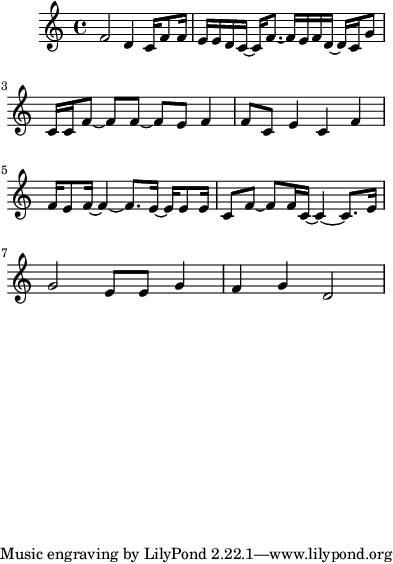

In [326]:
#@title Leitura à primeira vista
import random
import sys
from IPython.display import Image

#Lista de alturas
alturas_1 = ["b"]
alturas_2 = ["c", "d", "e"]
alturas_3 = ["c", "d", "e", "f", "g"]

#Listas tonais
alturas_do = ["c", "d", "e", "f", "g", "a", "b"]
alturas_re = ["d", "e", "fis", "g", "a", "b", "cis"]
alturas_mi = ["e", "fis", "gis", "a", "b", "cis", "dis"]
alturas_fa = ["f", "g", "a", "bes", "c", "d", "e"]
alturas_sol = ["g", "a", "b", "c", "d", "e", "fis"]
alturas_la = ["a", "b", "cis", "d", "e", "fis", "gis"]
alturas_si = ["b", "cis", "dis", "e", "fis", "gis", "ais"]
alturas_reb = ["des", "ees", "f", "ges", "aes", "bes", "c"]
alturas_mib = ["ees", "f", "g", "aes", "bes", "c", "d"]
alturas_solb = ["ges", "aes", "bes", "ces", "des", "ees", "f"]
alturas_lab = ["aes", "bes", "c", "des", "ees", "f", "g"]
alturas_sib = ["bes", "c", "d", "ees", "f", "g", "a"]

#Lista atonal
alturas_dodec = ["c", "cis", "d", "dis", "e", "f", "fis", "g", "gis", "a", "ais", "b"]

#Configura valores
clave = "Sol" #@param ["Sol", "Fá", "Dó"]
alturas = "Do-Sol" #@param ["Nenhuma", "Do-Mi", "Do-Sol", "Atonal", "Dó maior", "Réb maior", "Ré maior", "Mib maior", "Mi maior", "Fá maior", "Solb maior", "Sol maior", "Láb maior", "Lá maior", "Sib maior", "Si maior"]
oitavas = "1" #@param [1, 2, 3]
oitavas = int(oitavas)
minimas = True # @param {"type":"boolean"}
seminimas = True # @param {"type":"boolean"}
colcheias = True # @param {"type":"boolean"}
semicolcheias = True # @param {"type":"boolean"}
figuras_pontuadas = False # @param {"type":"boolean"}
#tercinas = False # @param {"type":"boolean"}
formula_compasso = "4/4" #@param ["2/4", "3/4", "4/4"]
#formula_compasso = "4/4" #@param ["2/4", "3/4", "4/4", "6/8", "9/8", "12/8", "3/8", "5/8", "7/8"]
numero_de_compassos = 8  #@param {type: "integer"}

if not minimas and not seminimas and not colcheias and not semicolcheias:
  sys.exit("Selecione ao menos um valor de duração.")

#Cria listas de durações
minima_pont = 12
minima = 8
seminima_pont = 6
seminima = 4
colcheia_pont = 3
colcheia = 2
semicolchea = 1

lis_dur = []
if minimas:
    lis_dur.append(minima)
    if figuras_pontuadas:
        lis_dur.append(minima_pont)
if seminimas:
    lis_dur.append(seminima)
    if figuras_pontuadas:
        lis_dur.append(seminima_pont)
if colcheias:
    lis_dur.append(colcheia)
    if figuras_pontuadas:
        lis_dur.append(colcheia_pont)
if semicolcheias:
    lis_dur.append(semicolchea)

#Função para permutar ou selecionar
def permuta(lista, tipo="permuta"):
    if tipo == "permuta":
        copia = lista[:]
        random.shuffle(copia)
        return copia
    elif tipo == "seleciona":
        return random.choice(lista)
    else:
        raise ValueError("Tipo inválido.")

#Gera uma série rítmica com a duração de um compasso

def adiciona_valor(lista_dur, form_comp, num_comp):
    duracoes = []
    duracao_total_compasso = form_comp
    for i in range(num_comp):
        tempo_restante_no_compasso = duracao_total_compasso
        while tempo_restante_no_compasso > 0:
            durações_possiveis = [dur for dur in lista_dur if dur <= tempo_restante_no_compasso]
            if not durações_possiveis:
                break
            duracao_escolhida = random.choice(durações_possiveis)
            duracoes.append(duracao_escolhida)
            tempo_restante_no_compasso -= duracao_escolhida
    return duracoes

if formula_compasso == "2/4":
  lis_dur = adiciona_valor(lis_dur, 8, numero_de_compassos)
elif formula_compasso == "3/4":
  lis_dur = adiciona_valor(lis_dur, 12, numero_de_compassos)
elif formula_compasso == "4/4":
  lis_dur = adiciona_valor(lis_dur, 16, numero_de_compassos)
elif formula_compasso == "6/8":
  lis_dur = adiciona_valor(lis_dur, 12, numero_de_compassos)
elif formula_compasso == "9/8":
  lis_dur = adiciona_valor(lis_dur, 18, numero_de_compassos)
elif formula_compasso == "12/8":
  lis_dur = adiciona_valor(lis_dur, 24, numero_de_compassos)
elif formula_compasso == "3/8":
  lis_dur = adiciona_valor(lis_dur, 6, numero_de_compassos)
elif formula_compasso == "5/8":
  lis_dur = adiciona_valor(lis_dur, 10, numero_de_compassos)
else:
  lis_dur = adiciona_valor(lis_dur, 14, numero_de_compassos)

#Converte a série rítmica em valores LilyPond:

def convert_dur(dur):
    conv = {12: "2.", 8: "2", 6: "4.", 4: "4", 3: "8.", 2: "8", 1: "16"}
    return conv[dur]

#seleciona nota randômica:

def oitavador(clave, oitavas):
  sol = ["'", "''", "'''"]
  fa = [",,", ",", ""]
  do = ["", "'", "''"]
  if clave == "Sol":
    lis_oit = sol[0:oitavas]
    oit = permuta(lis_oit, tipo="seleciona")
  elif clave == "Fá":
    lis_oit = fa[0:oitavas]
    oit = permuta(lis_oit, tipo="seleciona")
  else:
    lis_oit = do[0:oitavas]
    oit = permuta(lis_oit, tipo="seleciona")
  return oit

def nota_randomica(conj_notas):
  if clave == "Sol":
    nota = permuta(conj_notas, tipo="seleciona")+oitavador(clave, oitavas)
  elif clave == "Fá":
    nota = permuta(conj_notas, tipo="seleciona")+oitavador(clave, oitavas)
  else:
    nota = permuta(conj_notas, tipo="seleciona")+oitavador(clave, oitavas)
  return nota

#Configura lista de alturas

dic_alturas = {"Nenhuma": alturas_1,
    "Do-Mi": alturas_2,
    "Do-Sol": alturas_3,
    "Dó maior": alturas_do,
    "Réb maior": alturas_reb,
    "Ré maior": alturas_re,
    "Mib maior": alturas_mib,
    "Mi maior": alturas_mi,
    "Fá maior": alturas_fa,
    "Solb maior": alturas_solb,
    "Sol maior": alturas_sol,
    "Láb maior": alturas_lab,
    "Lá maior": alturas_la,
    "Sib maior": alturas_sib,
    "Si maior": alturas_si,
    "Atonal": alturas_dodec}

lis_alt = dic_alturas[alturas]


#Formata a série de duração
if formula_compasso == "2/4" or formula_compasso == "3/4" or formula_compasso == "4/4":

  # define duração total do compasso
  if formula_compasso == "2/4":
    tempo_compasso = 8
  elif formula_compasso == "3/4":
    tempo_compasso = 12
  else:
    tempo_compasso = 16

  lis_dur_formatada = []
  tempo = 4
  tempo_comp = tempo_compasso

  #Ajusta agrupamentos na unidade de tempo
  for dur in lis_dur:
    altura = nota_randomica(lis_alt)
    diferenca = tempo - dur
    if diferenca > 0:
      lis_dur_formatada.append(altura+convert_dur(dur))
      tempo -= dur
    elif diferenca == 0:
      lis_dur_formatada.append(altura+convert_dur(dur))
      tempo = 4
    else:
      if dur == 8 and tempo_comp in [16, 12, 8]: #se couber, usa mínima
        lis_dur_formatada.append(altura+convert_dur(8))
        tempo = 4
      elif dur == 12 and tempo_comp in [16, 12]: #se couber, usa mínima pontuada
        lis_dur_formatada.append(altura+convert_dur(12))
        tempo = 4
      else:
        lis_dur_formatada.append(altura+convert_dur(tempo)+"~") #adicionar ligaduras
        if diferenca <= -4:
          if diferenca % 4 == 0:
            durs = abs(diferenca)//4
            for i in range(durs-1):
              lis_dur_formatada.append(altura+convert_dur(4)+"~") #com ligadura
            lis_dur_formatada.append(altura+convert_dur(4)) # sem ligadura
            tempo = 4
          else:
            resto = abs(diferenca) % 4
            durs = abs(diferenca)//4
            for i in range(durs):
              lis_dur_formatada.append(altura+convert_dur(4)+"~")
            lis_dur_formatada.append(altura+convert_dur(resto))
            tempo = 4 - resto
        else:
          lis_dur_formatada.append(convert_dur(abs(diferenca)))
          tempo = 4 + diferenca

    tempo_comp -= dur
    if tempo_comp <= 0:
      tempo_comp += tempo_compasso #reinicia contagem do comp.


#Cria strings para LilyPond
string_lily = ""
for nota in lis_dur_formatada:
  string_lily += f"{nota} "

#Criar conteúdo LilyPond
if clave == "Sol":
  clef = "\clef G"
elif clave == "Fá":
  clef = "\clef F"
else:
  clef = "\clef C"

lilypond_code = f"""
\\version "2.22.1"
\\paper {{
  #(set-paper-size "a6")
}}
{{
  \\time {formula_compasso}
  {clef} {string_lily}
}}
"""

#Salvar em arquivo .ly
with open("leitura.ly", "w") as f:
    f.write(lilypond_code)

#Renderizar para PNG
!lilypond -dbackend=eps -dno-gs-load-fonts -dinclude-eps-fonts --png leitura.ly

#Mostrar imagem no Colab
Image("leitura.png")
